In [6]:
import pandas as pd
from keras.models import Sequential
from keras.utils import np_utils as utils
from keras.layers import Dropout, Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  f1_score, roc_auc_score, roc_curve

In [7]:
# Loading object 1
s = ['side1-0.5.csv', 'side1-0.8.csv', 'side1-1.2m.csv', 'side1-1.6.csv', 'side2-0.5.csv', 'side2-0.8.csv', 'side2-1.2.csv', 'side2-1.6.csv']

c = pd.read_csv('object1/'+s[0])
c2 = pd.read_csv('object1/'+s[1])
c3 = pd.read_csv('object1/'+s[2])
c4 = pd.read_csv('object1/'+s[3])
c5 = pd.read_csv('object1/'+s[4])
c6 = pd.read_csv('object1/'+s[5])
c7 = pd.read_csv('object1/'+s[6])
c8 = pd.read_csv('object1/'+s[7])

In [8]:
# Loading object 2
s = ['front-black-1.csv', 'front-black-1.2.csv','front-black0.5.csv','front-yellow-1.2.csv', 'front-yellow-1.csv','front-yellow0.5.csv',
     'frontblack-0.8.csv','frontblack-1.5.csv', 'frontblack-1.6.csv', 'frontyellow-0.8.csv','frontyellow-1.6.csv',]

o = pd.read_csv('object2/'+s[0])
o2 = pd.read_csv('object2/'+s[1])
o3 = pd.read_csv('object2/'+s[2])
o4 = pd.read_csv('object2/'+s[3])
o5 = pd.read_csv('object2/'+s[4])
o6 = pd.read_csv('object2/'+s[5])
o7 = pd.read_csv('object2/'+s[6])
o8 = pd.read_csv('object2/'+s[7])
o9 = pd.read_csv('object2/'+s[8])
o10 = pd.read_csv('object2/'+s[9])
o11 = pd.read_csv('object2/'+s[10])

In [9]:
#Prepairing training set !!! test_data %20


#label 0 in y
dtr1 = c[c.columns[24:30]] 
dtr2 = c2[c2.columns[24:30]] 
dtr3 = c3[c3.columns[24:30]] 
dtr4 = c4[c4.columns[24:30]] 
dtr5 = c5[c5.columns[24:30]] 
dtr6 = c6[c6.columns[24:30]]  
dtr7 = c7[c7.columns[24:30]]  
dtr8 = c8[c8.columns[24:30]] 

#label 1 in y
dt1 = o[o.columns[24:30]]  
dt2 = o2[o2.columns[24:30]] 
dt3 = o3[o3.columns[24:30]] 
dt4 = o4[o4.columns[24:30]] 
dt5 = o5[o5.columns[24:30]]  
dt6 = o6[o6.columns[24:30]] 
dt7 = o7[o7.columns[24:30]] 
dt8 = o8[o8.columns[24:30]] 
dt9 = o9[o9.columns[24:30]]  
dt10 = o10[o10.columns[24:30]] 
dt11 = o11[o11.columns[24:30]] 

dy_test = [0]* 48 +[1] * 66
dy_test = np.asarray(dy_test)

d_test = pd.concat([dtr1, dtr2, dtr3, dtr4, dtr5, dtr6, dtr7, dtr8, dt1, dt2, dt3, dt4, dt5, dt6, dt7, dt8, dt9, dt10, dt11], axis=1, join='inner') 
dy_test.shape


(114,)

In [10]:
#Prepairing training set !!! Validation_data %20

dtr1 = c[c.columns[18:24]] 
dtr2 = c2[c2.columns[18:24]] 
dtr3 = c3[c3.columns[18:24]] 
dtr4 = c4[c4.columns[18:24]] 
dtr5 = c5[c5.columns[18:24]] 
dtr6 = c6[c6.columns[18:24]] 
dtr7 = c7[c7.columns[18:24]] 
dtr8 = c8[c8.columns[18:24]] 

dt1 = o[o.columns[18:24]] 
dt2 = o2[o2.columns[18:24]] 
dt3 = o3[o3.columns[18:24]] 
dt4 = o4[o4.columns[18:24]] 
dt5 = o5[o5.columns[18:24]] 
dt6 = o6[o6.columns[18:24]] 
dt7 = o7[o7.columns[18:24]] 
dt8 = o8[o8.columns[18:24]] 
dt9 = o9[o9.columns[18:24]] 
dt10 = o10[o10.columns[18:24]] 
dt11 = o11[o11.columns[18:24]] 

dy_val = [0]* 48 +[1] * 66
dy_val = np.asarray(dy_val)

d_val = pd.concat([dtr1, dtr2, dtr3, dtr4, dtr5, dtr6, dtr7, dtr8, dt1, dt2, dt3, dt4, dt5, dt6, dt7, dt8, dt9, dt10, dt11], axis=1, join='inner') 
dy_val.shape


(114,)

In [11]:
#Prepairing training set !!! train_data %60

dtr1 = c[c.columns[:18]] 
dtr2 = c2[c2.columns[:18]] 
dtr3 = c3[c3.columns[:18]] 
dtr4 = c4[c4.columns[:18]] 
dtr5 = c5[c5.columns[:18]] 
dtr6 = c6[c6.columns[:18]] 
dtr7 = c7[c7.columns[:18]] 
dtr8 = c8[c8.columns[:18]] 

dt1 = o[o.columns[:18]] 
dt2 = o2[o2.columns[:18]] 
dt3 = o3[o3.columns[:18]] 
dt4 = o4[o4.columns[:18]] 
dt5 = o5[o5.columns[:18]] 
dt6 = o6[o6.columns[:18]] 
dt7 = o7[o7.columns[:18]] 
dt8 = o8[o8.columns[:18]] 
dt9 = o9[o9.columns[:18]] 
dt10 = o10[o10.columns[:18]] 
dt11 = o11[o11.columns[:18]] 

dy_tr = [0]* 144 +[1] * 198
dy_tr = np.asarray(dy_tr)

d_train = pd.concat([dtr1, dtr2, dtr3, dtr4, dtr5, dtr6, dtr7, dtr8, dt1, dt2, dt3, dt4, dt5, dt6, dt7, dt8, dt9, dt10, dt11], axis=1, join='inner') 
dy_tr.shape


(342,)

In [12]:
# Reshaping DATA X_train

X_train = d_train.transpose()
X_train = np.array(X_train.values.tolist())
X_train = X_train.reshape(342,1, 16384,1)


# Reshaping DATA X_validation

X_validation = d_val.transpose()
X_validation = np.array(X_validation.values.tolist())
X_validation = X_validation.reshape(114,1, 16384,1)

# Reshaping DATA X_test

X_test = d_test.transpose()
X_test = np.array(X_test.values.tolist())
X_test = X_test.reshape(114,1, 16384,1)

# Y train assigning
y_train = dy_tr
y_train = to_categorical(y_train)

# Y validation assigning
y_validation = dy_val
y_validation = to_categorical(y_validation)

# Y test assigning
y_test = dy_test
y_test = to_categorical(y_test)

y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [13]:
model = Sequential()

# 1st conv layer
model.add(Conv2D(32, (1, 2), activation='relu', input_shape=(1,16384,1)))
model.add(MaxPooling2D((1, 2), strides=(1, 2), padding='same'))
model.add(keras.layers.BatchNormalization())
# 2nd conv layer
model.add(keras.layers.Conv2D(32, (1, 2), activation='relu'))
model.add(keras.layers.MaxPooling2D((1, 2), strides=(1, 2), padding='same'))
model.add(keras.layers.BatchNormalization())

# 3rd conv layer
model.add(keras.layers.Conv2D(32, (1, 2), activation='relu'))
model.add(keras.layers.MaxPooling2D((1, 2), strides=(1, 2), padding='same'))
model.add(keras.layers.BatchNormalization())

# flatten output and feed it into dense layer
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(80, activation='relu'))
model.add(keras.layers.Dropout(0.3))

# output layer
model.add(keras.layers.Dense(2, activation='softmax'))

In [14]:
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 16383, 32)      96        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 8192, 32)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 8192, 32)       128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 8191, 32)       2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 4096, 32)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 4096, 32)       128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 4095, 32)       2

In [15]:
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=5, epochs=10)

Epoch 1/10
69/69 [==============================] - 30s 283ms/step - loss: 1.3782 - accuracy: 0.6989 - val_loss: 0.4257 - val_accuracy: 0.7982
Epoch 2/10
69/69 [==============================] - 17s 238ms/step - loss: 0.2637 - accuracy: 0.9303 - val_loss: 0.3900 - val_accuracy: 0.8772
Epoch 3/10
69/69 [==============================] - 16s 229ms/step - loss: 0.1038 - accuracy: 0.9638 - val_loss: 0.2424 - val_accuracy: 0.9123
Epoch 4/10
69/69 [==============================] - 17s 240ms/step - loss: 0.0768 - accuracy: 0.9607 - val_loss: 0.2699 - val_accuracy: 0.9123
Epoch 5/10
69/69 [==============================] - 19s 275ms/step - loss: 0.0830 - accuracy: 0.9727 - val_loss: 0.4840 - val_accuracy: 0.7982
Epoch 6/10
69/69 [==============================] - 16s 235ms/step - loss: 0.1135 - accuracy: 0.9727 - val_loss: 0.2154 - val_accuracy: 0.9035
Epoch 7/10
69/69 [==============================] - 18s 259ms/step - loss: 0.0538 - accuracy: 0.9835 - val_loss: 0.0561 - val_accuracy: 0.9737

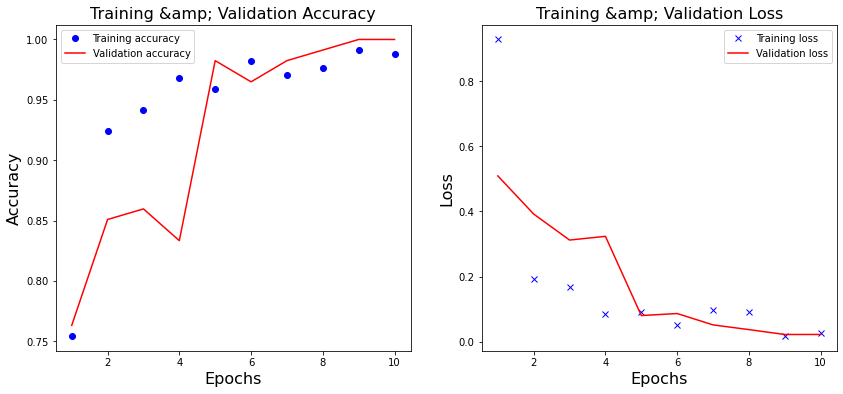

In [11]:
## Ploting

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
  
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'r', label='Validation accuracy')
ax[0].set_title('Training &amp; Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bx', label='Training loss') 
ax[1].plot(epochs, val_loss_values, 'r', label='Validation loss')
ax[1].set_title('Training &amp; Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

plt.show()

Result

After training the model with X_train and X_Validation on 10 epochs, and with a batch_size equal to 5, the model gives a final accuracy of : 0.9912280, this result are based on a strange data set "X_test" to the training set, and the loss value reached :0.0295263, in the trainnig process the model took on each epochs an average of 18 second/step, starting with a Training loss: 1.3782, and Validation loss: 0.4257, then the Training loss droped to 0.2637 and continued falctuation between 0.1135 and 0.05 until stabilize on 0.0042, meanwhile the Validatin loss was bigger in the first 6 epochs then droped to 0.0496, as for Training accuracy start mediocre Training accuracy: 0.6989 then elevating to 0.9303 and ending 0.9988, in the other hand Validation accuracy took a slower development 0.7982 and ending by 0.9649 as shown in th plot below.
To epitomize the final accuracy and Training accuracy, Validation accuracy are contiguous so we can deduce that our model can sustaine a real world data in other words is scalable.

In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('test_acc:',test_acc )
print('test_loss:',test_loss )

4/4 [==============================] - 1s 163ms/step - loss: 0.0295 - accuracy: 0.9912
test_acc: 0.9912280440330505
test_loss: 0.029526393860578537


In [19]:
def predict_classes(self, x, batch_size=32, verbose=1):
    '''Generate class predictions for the input samples
    batch by batch.
    # Arguments
        x: input data, as a Numpy array or list of Numpy arrays
            (if the model has multiple inputs).
        batch_size: integer.
        verbose: verbosity mode, 0 or 1.
    # Returns
        A numpy array of class predictions.
    '''
    proba = self.predict(x, batch_size=batch_size, verbose=verbose)
    if proba.shape[-1] > 1:
        return proba.argmax(axis=-1)
    else:
        return (proba > 0.5).astype('int32')

In [112]:
# Rounding predictions because of multiclasses
rounded_predictions = predict_classes(model, X_test);
rounded_labels=np.argmax(y_test, axis=1)
cm = confusion_matrix(rounded_labels, rounded_predictions)

# FP, FN, TP, TN
FP = cm.sum(axis=0) - np.diag(cm)  
print("FP : ",FP)
FN = cm.sum(axis=1) - np.diag(cm)
print("FN : ",FN)
TP = np.diag(cm)
print("TP : ",TP)
TN = cm.sum() - (FP + FN + TP)
print("TN : ",TN)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("TPR : ",TPR)

# Specificity or true negative rate
TNR = TN/(TN+FP) 
print("TNR : ",TNR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print("PPV : ", PPV)

# Negative predictive value
NPV = TN/(TN+FN)
print("NPV : ",NPV)

# Fall out or false positive rate
FPR = FP/(FP+TN)
print("FPR : ",FPR)

# False negative rate
FNR = FN/(TP+FN)
print("FNR : ",FNR)

# False discovery rate
FDR = FP/(TP+FP)
print("FDR : ",FDR)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("ACC : ",ACC)

# F1 Score
F1 = f1_score(rounded_labels, rounded_predictions)
print("F1 Score : ", F1)

4/4 [==============================] - 1s 164ms/step
FP :  [0 5]
FN :  [5 0]
TP :  [43 66]
TN :  [66 43]
TPR :  [0.89583333 1.        ]
TNR :  [1.         0.89583333]
PPV :  [1.         0.92957746]
NPV :  [0.92957746 1.        ]
FPR :  [0.         0.10416667]
FNR :  [0.10416667 0.        ]
FDR :  [0.         0.07042254]
ACC :  [0.95614035 0.95614035]
F1 Score :  0.9635036496350364
1/1 [==============================] - 0s 102ms/step


In [46]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

auc = roc_auc_score(rounded_labels, rounded_predictions)
print('AUC: %.2f' % auc)

AUC: 0.99


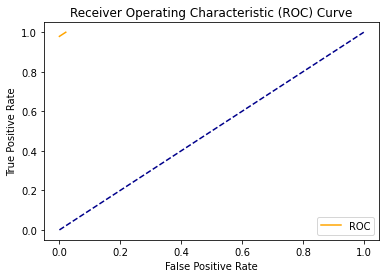

In [47]:
plot_roc_curve(FPR, TPR)

## For more information about ROC 

https://stackabuse.com/understanding-roc-curves-with-python/

----
# Anvil prep
-----

In [1]:
pip install anvil-uplink

  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45215 sha256=1e2ff8de99cdfbd6971f67ad5ea2b9e793231476e580eb0d6d3a1e79a5399ae7
  Stored in directory: c:\users\zohair\appdata\local\pip\cache\wheels\ea\f9\a1\34e2943cce3cf7daca304bfc35e91280694ced9194a487ce2f
Successfully built ws4py
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Accès refusé: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\tables\\__init__.py'
Consider using the `--user` option or check the permissions.



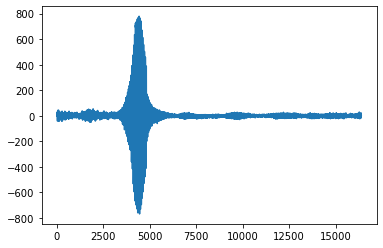

In [99]:
import anvil.server
import anvil.mpl_util

anvil.server.connect("IENQAFSXPANG77AFDTYTC4E2-5XNVA4KIZCRITORA")

In [93]:
@anvil.server.callable
def roc_elem(test_id):
    
    rounded_predictions = predict_classes(model, X_test);
    rounded_labels=np.argmax(y_test, axis=1)
    cm = confusion_matrix(rounded_labels, rounded_predictions)

    # FP, FN, TP, TN
    FP = cm.sum(axis=0) - np.diag(cm)  
    
    FN = cm.sum(axis=1) - np.diag(cm)
    
    TP = np.diag(cm)
    
    TN = cm.sum() - (FP + FN + TP)

    TPR = TP/(TP+FN)

    TNR = TN/(TN+FP) 

    NPV = TN/(TN+FN)

    FDR = FP/(TP+FP)

    ACC = (TP+TN)/(TP+FP+FN+TN)

    F1 = f1_score(rounded_labels, rounded_predictions)
    
    return TP, TN, FP, FN, NPV, TNR, FDR, TPR, F1, ACC

In [94]:
@anvil.server.callable
def obj_detect(test_id):
    rounded_predictions = predict_classes(model, X_test[test_id].reshape(1,1,16384,1));
    return rounded_predictions[0] + 1
    

In [60]:
X_test.shape

(114, 1, 16384, 1)

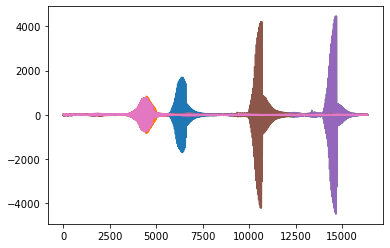

1/1 [==============================] - 0s 43ms/step


In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np

@anvil.server.callable
def obj_plot(test_id):
    plt.plot(X_test[test_id].reshape(16384, 1))
    return anvil.mpl_util.plot_image()
   

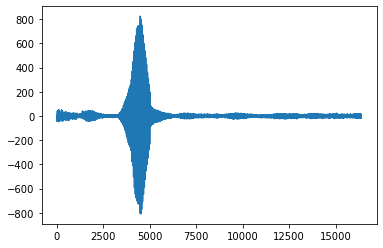

In [89]:
plt.plot(X_test[0].reshape(16384, 1))